### CIFAR10のデータセットをCNNで分類

In [2]:
import torch as tc
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision as tv
from torchvision import transforms

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
device = tc.device('cuda:0' if tc.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = tv.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = tc.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = tc.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


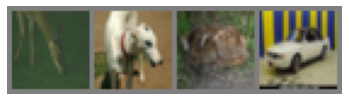

 deer   dog  deer   car


In [6]:
def imshow(img):
    img = img/ 2 + 0.5
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        print(outputs.shape)
        print(labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('%d, %5d loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finish Training')

torch.Size([4, 10])
tensor([2, 3, 5, 3], device='cuda:0')
torch.Size([4, 10])
tensor([2, 7, 4, 4], device='cuda:0')
torch.Size([4, 10])
tensor([5, 0, 8, 8], device='cuda:0')
torch.Size([4, 10])
tensor([6, 7, 6, 7], device='cuda:0')
torch.Size([4, 10])
tensor([9, 7, 2, 8], device='cuda:0')
torch.Size([4, 10])
tensor([0, 0, 0, 7], device='cuda:0')
torch.Size([4, 10])
tensor([7, 0, 4, 0], device='cuda:0')
torch.Size([4, 10])
tensor([8, 2, 9, 1], device='cuda:0')
torch.Size([4, 10])
tensor([3, 8, 2, 4], device='cuda:0')
torch.Size([4, 10])
tensor([3, 6, 3, 6], device='cuda:0')
torch.Size([4, 10])
tensor([1, 6, 0, 4], device='cuda:0')
torch.Size([4, 10])
tensor([7, 3, 2, 6], device='cuda:0')
torch.Size([4, 10])
tensor([3, 0, 9, 5], device='cuda:0')
torch.Size([4, 10])
tensor([4, 4, 6, 9], device='cuda:0')
torch.Size([4, 10])
tensor([6, 2, 6, 3], device='cuda:0')
torch.Size([4, 10])
tensor([8, 8, 3, 6], device='cuda:0')
torch.Size([4, 10])
tensor([8, 0, 4, 8], device='cuda:0')
torch.Size([4,

KeyboardInterrupt: 

In [ ]:
tc.save(net.state_dict(), './cifar_net.pth')

In [ ]:
correct = 0
total = 0
with tc.no_grad():
    for (images, labels) in testloader:
        outputs = net(images)
        _, predicted = tc.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [ ]:
print('Accuracy: %d %%' % (100 * correct / total))